In [85]:
#### 数据的准备

import matplotlib.pyplot as plt
import numpy as np

In [86]:
### 各种定义

# x轴的定义范围
x_max = 1
x_min = -1

# y轴的定义范围
y_max = 2
y_min = -1

# 比例，1单位使用几点
SCALE = 50

# 通过 train/test 指定Test数据的比例
TEST_RATE = 0.3

### 数据生成
data_x = np.arange(x_min, x_max, 1/float(SCALE)).reshape(-1, 1)

data_ty = data_x ** 2 # 乘以噪声前的值

data_vy = data_ty + np.random.randn(len(data_ty), 1) * 0.5 # 乘以噪声

### 分割为学习数据/测试数据(在分类问题、回归问题上使用)

# 学习数据/测试数据的分割处理
def split_train_test(array):
    length = len(array)
    n_train = int(length * (1 - TEST_RATE))

    indices = list(range(length))
    np.random.shuffle(indices)
    idx_train = indices[:n_train]
    idx_test = indices[n_train:]

    return sorted(array[idx_train]), sorted(array[idx_test])

# 分割目录清单
indices = np.arange(len(data_x))
idx_train, idx_test = split_train_test(indices)

# 学习数据
x_train = data_x[idx_train]
y_train = data_vy[idx_train]

# 测试数据
x_test = data_x[idx_test]
y_test = data_vy[idx_test]

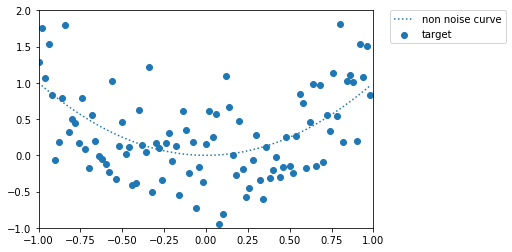

In [87]:
### 描绘图表

# 分析对象点的散布图
plt.scatter(data_x, data_vy, label='target')

# 显示原始的线
plt.plot(data_x, data_ty, linestyle=":", label="non noise curve")

# 设定x轴/y轴的范围
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 指定图例的显示位置
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)

# 显示图表
plt.show()

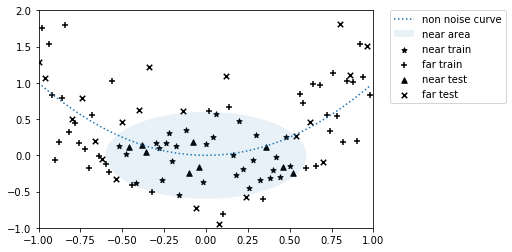

In [88]:
#### 分类问题

### 创建分类标签

# 分类的阈值 从原点开始的半径
CLASS_RADIUS = 0.6

# 通过近/远区分类比 -- 近的话True, 远的话False
labels = (data_x**2+data_vy**2) < CLASS_RADIUS**2

# 在学习数据/测试数据上分割
label_train = labels[idx_train] # 学习数据
label_test = labels[idx_test] # 测试数据

### 绘制图表
plt.scatter(x_train[label_train], y_train[label_train], c='black', s=30, marker='*', label='near train')

plt.scatter(x_train[label_train != True], y_train[label_train != True], c='black', s=30, marker='+', label="far train")

plt.scatter(x_test[label_test], y_test[label_test], c='black', s=30, marker='^', label="near test")

plt.scatter(x_test[label_test != True], y_test[label_test != True], c='black', s=30, marker='x', label='far test')

# 显示原始的线
plt.plot(data_x, data_ty, linestyle=":", label="non noise curve")

# 等级的分离圆
circle = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label="near area")

ax = plt.gca()
ax.add_patch(circle)

# 设定x轴/y轴的范围
plt.xlim(x_min, x_max) # x轴的范围设定
plt.ylim(y_min, y_max) # y轴的范围设定

# 指定图片的显示位置
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 显示图集
plt.show()

In [89]:
### 学习

from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

data_train = np.c_[x_train, y_train]
data_test = np.c_[x_test, y_test]

# SVM分类器的创建、学习
classifier = svm.SVC(gamma=1)
classifier.fit(data_train,label_train.reshape(-1))

# 在Test 数据上评价
pred_test = classifier.predict(data_test)

# 显示Accuracy
print('accuracy_score:\n', accuracy_score(label_test.reshape(-1), pred_test))

# 显示混淆矩阵
print('Confusion matrix:\n', confusion_matrix(label_test.reshape(-1), pred_test))


accuracy_score:
 0.9
Confusion matrix:
 [[18  3]
 [ 0  9]]


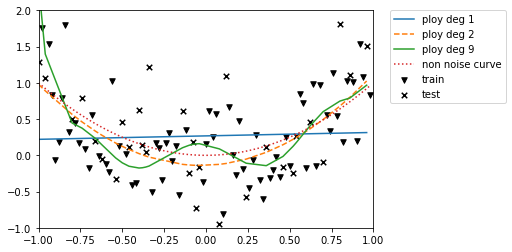

In [90]:
#### 回归问题

from sklearn import linear_model

### 在1次方上的回归

# x 值
x1_TRAIN = x_train
X1_TEST = x_test

# 学习
model = linear_model.LinearRegression()
model.fit(x1_TRAIN, y_train)

# 在图表上描绘
plt.plot(x_test, model.predict(X1_TEST), linestyle='-', label='ploy deg 1')

### 在2次方上的回归

# x 值
X2_TRAIN = np.c_[x_train**2, x_train]
X2_TEST = np.c_[x_test**2, x_test]

# 学习
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, y_train)

# 在图表上描绘
plt.plot(x_test, model.predict(X2_TEST), linestyle='--', label='ploy deg 2')

### 在9次方上的回归

# x 值
X9_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train]
X9_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5, x_test**4, x_test**3, x_test**2, x_test]

# 学习
model = linear_model.LinearRegression()
model.fit(X9_TRAIN, y_train)

# 在图表上描绘
plt.plot(x_test, model.predict(X9_TEST),linestyle='-', label='ploy deg 9')

### 数据的显示

plt.scatter(x_train, y_train, c='black', s=30, marker='v', label='train')

plt.scatter(x_test, y_test, c='black', s=30, marker='x', label='test')

# 显示原始的线
plt.plot(data_x, data_ty, linestyle=":", label='non noise curve')

# 设定x轴/y轴的范围
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 指定图例的显示位置
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)

# 显示图集
plt.show()

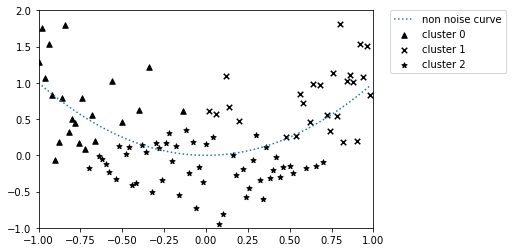

In [91]:
#### 聚类

from sklearn import cluster

# 组合x ,y数据
data = np.c_[data_x, data_vy]

# 在3个集群上分类
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# data的分类结果, 编号为(0 ~ (n_cluster-1))
labels = model.labels_

plt.scatter(data_x[labels == 0], data_vy[labels == 0], c='black', s=30, marker='^', label='cluster 0')
plt.scatter(data_x[labels == 1], data_vy[labels == 1], c='black', s=30, marker='x', label='cluster 1')
plt.scatter(data_x[labels == 2], data_vy[labels == 2], c='black', s=30, marker='*', label='cluster 2')

# 显示原始的线
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

# 设定x轴/y轴的范围
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 指定图例表示的位置
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 显示图表
plt.show()